# Table des matières

- # [Imports](#section_1)
    - ## [Import des librairies](#section_1_1)
    - ## [Import des données](#section_1_2)
<br>

- # [Nettoyage des données](#section_2)
	- ## [Nettoyage du df pib_stabilite_politique](#section_2_1)
	- ## [Nettoyage du df population](#section_2_2)
	- ## [Nettoyage du df dispo_alimentaire](#section_2_3)	
<br>

- # [Jointures](#section_3)
    - ## [Première jointure (dispo_alimentaire et PIB/stabilité_politique)](#section_3_1)
    - ## [Deuxième jointure (résultat jointure précédente et population)](#section_3_2)
<br>

- # [Traitement des valeurs nulles](#section_4)
<br>

# <a class="anchor" id="section_1">Imports</a>

## <a class="anchor" id="section_1_1">Import des librairies</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## <a class="anchor" id="section_1_2">Import des données</a>

In [3]:
# Import des trois dataframes

df_population = pd.read_csv('Data/Population_2000_2018.csv')
df_dispo_alimentaire = pd.read_csv('Data/DisponibiliteAlimentaire_2017.csv')
df_pib_stabilite_politique = pd.read_csv('Data/pib_stabilite_politique_2017.csv')

# <a class="anchor" id="section_2">Nettoyage des données</a>

## <a class="anchor" id="section_2_1">Nettoyage du df pib_stabilite_politique</a>

In [4]:
# Aperçu de l'import
display(df_pib_stabilite_politique.head())

,Domaine,Zone,Élément,Produit,Année,Unité,Valeur
0,Données de la sécurité alimentaire,Afghanistan,Valeur,"PIB par habitant, ($ PPA internationaux consta...",2017,I$,2058.40
1,Données de la sécurité alimentaire,Afghanistan,Valeur,Stabilité politique et absence de violence/ter...,2017,indice,-2.80
2,Données de la sécurité alimentaire,Afrique du Sud,Valeur,"PIB par habitant, ($ PPA internationaux consta...",2017,I$,13860.30
3,Données de la sécurité alimentaire,Afrique du Sud,Valeur,Stabilité politique et absence de violence/ter...,2017,indice,-0.28
4,Données de la sécurité alimentaire,Albanie,Valeur,"PIB par habitant, ($ PPA internationaux consta...",2017,I$,12771.00


In [5]:
# Vérification de valeurs nulles
df_pib_stabilite_politique.isna().sum()

Domaine    0
Zone       0
Élément    0
Produit    0
Année      0
Unité      0
Valeur     0
dtype: int64

In [6]:
# Modification pour ne garder que les colonnes utiles pour la suite
df_pib_stabilite_politique = df_pib_stabilite_politique[['Zone', 'Produit', 'Valeur']]
df_pib_stabilite_politique.head()

,Zone,Produit,Valeur
0,Afghanistan,"PIB par habitant, ($ PPA internationaux consta...",2058.40
1,Afghanistan,Stabilité politique et absence de violence/ter...,-2.80
2,Afrique du Sud,"PIB par habitant, ($ PPA internationaux consta...",13860.30
3,Afrique du Sud,Stabilité politique et absence de violence/ter...,-0.28
4,Albanie,"PIB par habitant, ($ PPA internationaux consta...",12771.00


In [7]:
df_pib_stabilite_politique_pivot = pd.pivot(
    df_pib_stabilite_politique, 
    index=['Zone'], 
    columns=['Produit'], 
    values=['Valeur'])
df_pib_stabilite_politique_pivot.head()

Valeur  \
Produit        PIB par habitant, ($ PPA internationaux constants de 2017)   
Zone                                                                        
Afghanistan                                               2058.40           
Afrique du Sud                                           13860.30           
Albanie                                                  12771.00           
Algérie                                                  11737.40           
Allemagne                                                53071.50           

                                                                               
Produit        Stabilité politique et absence de violence/terrorisme (indice)  
Zone                                                                           
Afghanistan                                                 -2.80              
Afrique du Sud                                              -0.28              
Albanie                                                      0.38              
Algérie                                                     -0.92              
Allemagne                                                    0.59

In [8]:
df_pib_stabilite_politique_pivot.columns = df_pib_stabilite_politique_pivot.columns.droplevel()

In [9]:
# Renommage des colonnes pour plus de lisibilité
df_pib_stabilite_politique_pivot = df_pib_stabilite_politique_pivot.rename(
    columns={'PIB par habitant, ($ PPA internationaux constants de 2017)': 'PIB par habitant', 
             'Stabilité politique et absence de violence/terrorisme (indice)': 'Stabilité politique'})

df_pib_stabilite_politique_pivot.head()

Produit,PIB par habitant,Stabilité politique
Zone,,
Afghanistan,2058.40,-2.80
Afrique du Sud,13860.30,-0.28
Albanie,12771.00,0.38
Algérie,11737.40,-0.92
Allemagne,53071.50,0.59


In [10]:
# Vérification des valeurs nulles, elles seront traitées par la suite
df_pib_stabilite_politique_pivot[df_pib_stabilite_politique_pivot.isna().any(axis=1)]

Produit,PIB par habitant,Stabilité politique
Zone,,
Andorre,NaN,1.42
Chine,14520.80,NaN
"Chine, Taiwan Province de",NaN,0.86
Cuba,NaN,0.65
Groenland,NaN,1.92
République arabe syrienne,NaN,-2.62
République populaire démocratique de Corée,NaN,-0.50
Samoa américaines,NaN,1.22
Soudan du Sud,NaN,-2.45


In [11]:
df_pib_stabilite_politique_pivot.describe()

Produit,PIB par habitant,Stabilité politique
count,187.00,197.00
mean,20925.34,-0.06
std,22086.26,0.99
min,773.60,-2.94
25%,4862.70,-0.65
50%,13102.10,0.04
75%,29087.35,0.77
max,126144.00,1.92


In [12]:
# Vérification du pays avec le plus gros PIB par habitant
display(df_pib_stabilite_politique_pivot.sort_values(by='PIB par habitant', ascending=False))

Produit,PIB par habitant,Stabilité politique
Zone,,
Chine - RAS de Macao,126144.00,1.43
Luxembourg,114986.00,1.33
Singapour,95310.30,1.62
Qatar,91738.80,0.66
Bermudes,81835.00,1.00
...,...,...
Samoa américaines,NaN,1.22
Soudan du Sud,NaN,-2.45
Venezuela (République bolivarienne du),NaN,-1.27


## <a class="anchor" id="section_2_2">Nettoyage du df population</a>

In [13]:
display(df_population.head())

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.95,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.99,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.77,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.87,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.68,X,Sources internationales sûres,NaN


In [14]:
# Vérification de valeurs nulles
df_population.isna().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [15]:
# Nettoyage pour garder que l'année 2017 (pour être en accord avec les autres df)
df_population = df_population.loc[df_population['Année'] == 2017, :]

In [16]:
# Modification pour ne garder que les colonnes utiles pour la suite
df_population = df_population[['Zone', 'Valeur']]

In [17]:
# Renommage de la colonne "valeur" pour "population"
df_population = df_population.rename(columns={'Valeur' : 'Population'})

In [18]:
# Mis à l'échelle de la population
df_population['Population'] = df_population['Population'] * 1000

# Changement du dtype float en int
df_population['Population'] = df_population['Population'].astype('int64')

In [19]:
# Aperçu des modifications
display(df_population.head())
df_population.info()

,Zone,Population
17,Afghanistan,36296113
36,Afrique du Sud,57009756
55,Albanie,2884169
74,Algérie,41389189
93,Allemagne,82658409


<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 17 to 4409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Zone        236 non-null    object
 1   Population  236 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.5+ KB


In [20]:
df_population.describe()

,Population
count,236.00
mean,31983619.10
std,131894884.74
min,793.00
25%,380303.25
50%,5203510.50
75%,19308417.75
max,1421021791.00


In [21]:
# Vérification des valeurs maximum pour la population pour éviter les outliers
display(df_population.sort_values(by='Population', ascending=False))

,Zone,Population
823,"Chine, continentale",1421021791
1952,Inde,1338676785
1230,États-Unis d'Amérique,325084756
1971,Indonésie,264650963
3029,Pakistan,207906209
...,...,...
2725,Montserrat,4984
1781,Îles Falkland (Malvinas),3068
2896,Nioué,1609
4143,Tokélaou,1300


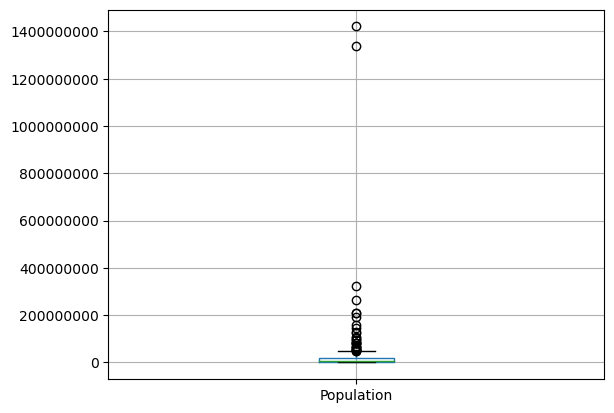

In [22]:
# Vérification graphique pour confirmer nos potentiels outliers
df_population.boxplot(column='Population')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Le cas de la Chine continentale et l'Inde sont confirmés et ont des valeurs extrêmes et peuvent être considérés comme outliers, cela sera traité par la suite.

In [23]:
# Vérification des valeurs minimum pour la population car cela ne sera vraiment des pays à cibler pour l'étude de marché
display(df_population.sort_values(by='Population', ascending=True).head(50))

,Zone,Population
3672,Saint-Siège,793
4143,Tokélaou,1300
2896,Nioué,1609
1781,Îles Falkland (Malvinas),3068
2725,Montserrat,4984
3653,Saint-Pierre-et-Miquelon,5887
3569,"Sainte-Hélène, Ascension et Tristan da Cunha",6008
3550,Saint-Barthélemy,9784
2801,Nauru,10573
4257,Tuvalu,11370


In [24]:
# Après une première réflexion, il a été décidé de ne pas répertorier les pays ayant moins de 30 000 habitants
df_population = df_population.loc[df_population['Population'] > 250000, :]

In [25]:
# Vérification
df_population.describe()

,Population
count,187.00
mean,40347534.99
std,147106790.07
min,252957.00
25%,2864791.50
50%,9450231.00
75%,28885241.50
max,1421021791.00


## <a class="anchor" id="section_2_3">Nettoyage du df dispo_alimentaire</a>

In [26]:
display(df_dispo_alimentaire.head())

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées


In [27]:
# Vérification de valeurs nulles
df_dispo_alimentaire.isna().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [28]:
# Modification pour ne garder que les colonnes utiles pour la suite
df_dispo_alimentaire = df_dispo_alimentaire[['Zone', 'Élément', 'Produit', 'Valeur']]

In [29]:
# Aperçu des modifications
display(df_dispo_alimentaire.head(10))

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.00
1,Afghanistan,Importations - Quantité,Blé et produits,2302.00
2,Afghanistan,Variation de stock,Blé et produits,-119.00
3,Afghanistan,Exportations - Quantité,Blé et produits,0.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.00
5,Afghanistan,Aliments pour animaux,Blé et produits,76.00
6,Afghanistan,Semences,Blé et produits,344.00
7,Afghanistan,Pertes,Blé et produits,642.00
8,Afghanistan,Résidus,Blé et produits,0.00
9,Afghanistan,Nourriture,Blé et produits,5640.00


In [30]:
# Aperçu des valeurs trouvées dans la colonne "Élément" pour ne garder que celles utiles
df_dispo_alimentaire['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [31]:
# Création d'une liste pour ne garder que celles utiles
liste_elements = (
    'Production', 'Importations - Quantité', 'Variation de stock',
    'Exportations - Quantité', 'Disponibilité intérieure', 'Nourriture',
    'Disponibilité alimentaire en quantité (kg/personne/an)',
    'Disponibilité alimentaire (Kcal/personne/jour)',
    'Disponibilité de protéines en quantité (g/personne/jour)',)

In [32]:
# Conservation des éléments cités dans la liste pour le df
df_dispo_alimentaire = df_dispo_alimentaire.loc[df_dispo_alimentaire['Élément'].isin(liste_elements), :]

# Aperçu des modifications
display(df_dispo_alimentaire.head(10))

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.00
1,Afghanistan,Importations - Quantité,Blé et produits,2302.00
2,Afghanistan,Variation de stock,Blé et produits,-119.00
3,Afghanistan,Exportations - Quantité,Blé et produits,0.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.00
9,Afghanistan,Nourriture,Blé et produits,5640.00
10,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Blé et produits,155.39
11,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Blé et produits,1331.00
12,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Blé et produits,35.88
14,Afghanistan,Production,Riz et produits,338.00


In [33]:
# Aperçu des valeurs trouvées dans la colonne "Produit" pour ne garder que celles utiles
df_dispo_alimentaire['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [34]:
# Ce qui nous intéresse, c'est "Viande de Volailles" pour cette étude de marché.
df_dispo_alimentaire = df_dispo_alimentaire.loc[df_dispo_alimentaire['Produit'] == 'Viande de Volailles', :]

In [35]:
# Aperçu des modifications
display(df_dispo_alimentaire.head())

,Zone,Élément,Produit,Valeur
651,Afghanistan,Production,Viande de Volailles,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,57.00
657,Afghanistan,Nourriture,Viande de Volailles,55.00


In [36]:
df_dispo_alimentaire_pivot = pd.pivot(df_dispo_alimentaire,
                                     index=['Zone'],
                                     columns=['Élément'],
                                     values=['Valeur'])

display(df_dispo_alimentaire_pivot.head())

Valeur  \
Élément        Disponibilité alimentaire (Kcal/personne/jour)   
Zone                                                            
Afghanistan                                              5.00   
Afrique du Sud                                         143.00   
Albanie                                                 85.00   
Algérie                                                 22.00   
Allemagne                                               71.00   

                                                                       \
Élément        Disponibilité alimentaire en quantité (kg/personne/an)   
Zone                                                                    
Afghanistan                                                  1.53       
Afrique du Sud                                              35.69       
Albanie                                                     16.36       
Algérie                                                      6.38       
Allemagne                                                   19.47       

                                                                         \
Élément        Disponibilité de protéines en quantité (g/personne/jour)   
Zone                                                                      
Afghanistan                                                  0.54         
Afrique du Sud                                              14.11         
Albanie                                                      6.26         
Algérie                                                      1.97         
Allemagne                                                    7.96         

                                                                 \
Élément        Disponibilité intérieure Exportations - Quantité   
Zone                                                              
Afghanistan                       57.00                     NaN   
Afrique du Sud                  2118.00                   63.00   
Albanie                           47.00                    0.00   
Algérie                          277.00                    0.00   
Allemagne                       1739.00                  646.00   

                                                              \
Élément        Importations - Quantité Nourriture Production   
Zone                                                           
Afghanistan                      29.00      55.00      28.00   
Afrique du Sud                  514.00    2035.00    1667.00   
Albanie                          38.00      47.00      13.00   
Algérie                           2.00     264.00     275.00   
Allemagne                       842.00    1609.00    1514.00   

                                   
Élément        Variation de stock  
Zone                               
Afghanistan                  0.00  
Afrique du Sud              -0.00  
Albanie                      4.00  
Algérie                      0.00  
Allemagne                  -29.00

Il y a un "NaN" dans la colonne "Exportations - Quantité", il faut regarder s'il n'y en a pas d'autres suite à ce pivot.

In [37]:
df_dispo_alimentaire_pivot.columns = df_dispo_alimentaire_pivot.columns.droplevel()

In [38]:
df_dispo_alimentaire_pivot.isna().sum()

Élément
Disponibilité alimentaire (Kcal/personne/jour)               0
Disponibilité alimentaire en quantité (kg/personne/an)       0
Disponibilité de protéines en quantité (g/personne/jour)     0
Disponibilité intérieure                                     2
Exportations - Quantité                                     37
Importations - Quantité                                      2
Nourriture                                                   2
Production                                                   4
Variation de stock                                           3
dtype: int64

Il y a 37 valeurs nulles compatibilisées pour la colonne "Exportations - Quantité". Deux choix sont possibles :  
- Remplacer les valeurs nulles par 0
- Appliquer une formule de calcul à l'aide d'informations déjà présentes dans ce df  
[Source du calcul](https://www.fao.org/3/X9892F/x9892f03.htm)

In [39]:
# Tentative de formule à l'aide de ce calcul : 
# Calcul 1 : (Production + Importations - Disponibilité alimentaire en quantité + Variation de Stock) 
# Calcul 2 : Résultat du calcul 1 - Disponibilité intérieure

df_dispo_alimentaire_pivot['Exportations - Quantité'] = df_dispo_alimentaire_pivot.apply(
    lambda x : ((x['Production'] + x['Importations - Quantité'] - 
                 x['Disponibilité alimentaire en quantité (kg/personne/an)'] + 
                 x['Variation de stock']) 
                - x['Disponibilité intérieure'])
    if pd.isnull(x['Exportations - Quantité']) else x['Exportations - Quantité'], axis=1)

In [40]:
display(df_dispo_alimentaire_pivot.head())
df_dispo_alimentaire_pivot.isna().sum()

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
Zone,,,,,,,,,
Afghanistan,5.00,1.53,0.54,57.00,-1.53,29.00,55.00,28.00,0.00
Afrique du Sud,143.00,35.69,14.11,2118.00,63.00,514.00,2035.00,1667.00,-0.00
Albanie,85.00,16.36,6.26,47.00,0.00,38.00,47.00,13.00,4.00
Algérie,22.00,6.38,1.97,277.00,0.00,2.00,264.00,275.00,0.00
Allemagne,71.00,19.47,7.96,1739.00,646.00,842.00,1609.00,1514.00,-29.00


Élément
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité alimentaire en quantité (kg/personne/an)      0
Disponibilité de protéines en quantité (g/personne/jour)    0
Disponibilité intérieure                                    2
Exportations - Quantité                                     4
Importations - Quantité                                     2
Nourriture                                                  2
Production                                                  4
Variation de stock                                          3
dtype: int64

La formule a pu remplacer une grande partie des valeurs manquantes. Il reste encore des valeures nulles dans les exportations, c'est peut-être du au fait qu'il y a quelques valeures nulles dans les autres colonnes.

In [41]:
# Vérification des valeurs nulles, elles seront traitées par la suite
df_dispo_alimentaire_pivot[df_dispo_alimentaire_pivot.isna().any(axis=1)]

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
Zone,,,,,,,,,
Djibouti,9.00,2.68,0.92,3.00,NaN,3.00,3.00,NaN,0.00
Maldives,47.00,13.50,4.70,12.00,NaN,12.00,7.00,NaN,0.00
Ouzbékistan,6.00,1.96,0.63,NaN,NaN,NaN,NaN,NaN,NaN
Pérou,62.00,13.47,6.71,1523.00,1.00,60.00,424.00,1465.00,NaN
République démocratique populaire lao,41.00,10.91,3.59,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df_dispo_alimentaire_pivot.describe()

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
count,172.00,172.00,172.00,170.00,168.00,170.00,170.00,168.00,169.00
mean,74.56,20.21,7.12,687.59,104.55,89.53,657.05,725.19,13.67
std,60.57,15.86,5.60,2187.18,463.74,186.67,2136.55,2501.46,75.36
min,0.00,0.13,0.04,2.00,-70.31,0.00,2.00,0.00,-119.00
25%,22.00,6.44,2.17,30.50,0.00,3.00,28.50,13.75,0.00
50%,64.00,18.09,6.50,100.00,1.00,16.00,99.50,70.00,0.00
75%,105.50,30.04,10.37,368.25,16.60,81.25,365.25,409.75,7.00
max,243.00,72.31,27.87,18266.00,4223.00,1069.00,18100.00,21914.00,859.00


In [43]:
# Vérification du pays avec une très grande quantité d'exportations
display(df_dispo_alimentaire_pivot.sort_values(by='Exportations - Quantité', ascending=False))

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
Zone,,,,,,,,,
Brésil,204.00,48.03,15.68,9982.00,4223.00,3.00,9982.00,14201.00,0.00
États-Unis d'Amérique,219.00,55.68,19.93,18266.00,3692.00,123.00,18100.00,21914.00,80.00
Pays-Bas,70.00,20.33,8.48,372.00,1418.00,608.00,346.00,1100.00,-82.00
Pologne,107.00,30.30,12.14,1156.00,1025.00,55.00,1150.00,2351.00,225.00
Thaïlande,47.00,12.95,4.35,881.00,796.00,2.00,896.00,1676.00,1.00
...,...,...,...,...,...,...,...,...,...
Saint-Vincent-et-les Grenadines,243.00,72.31,25.10,8.00,-70.31,9.00,8.00,0.00,1.00
Djibouti,9.00,2.68,0.92,3.00,NaN,3.00,3.00,NaN,0.00
Maldives,47.00,13.50,4.70,12.00,NaN,12.00,7.00,NaN,0.00


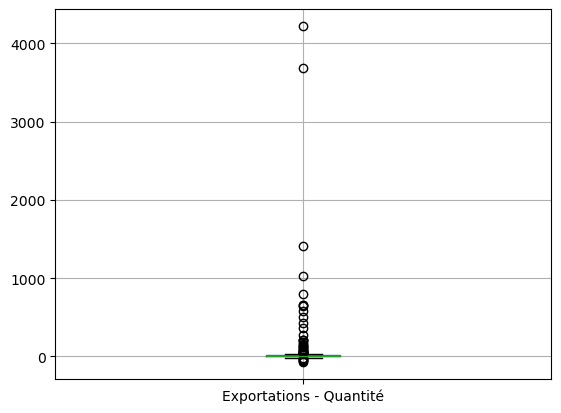

In [44]:
# Vérification graphique pour confirmer nos potentiels outliers
df_dispo_alimentaire_pivot.boxplot(column='Exportations - Quantité')
plt.show()

Le Brésil et les Etats-Unis seront considérés à part également du à leurs valeurs extrêmes à différente(s) variable(s).<br />
Il y a donc actuellement, en pays qui seront traités à part :
- Chine, continentale
- Inde
- Brésil
- Les États-Unis

# <a class="anchor" id="section_3">Jointures</a>

## <a class="anchor" id="section_3_1">Première jointure (dispo_alimentaire et PIB/stabilité_politique)</a>

In [45]:
# Première jointure entre les df "dispo alimentaire" et "PIB / stabilité politique"
# Outer join pour garder tous les pays pour l'instant
df_dispo_alimentaire_stabilite_politique = pd.merge(df_dispo_alimentaire_pivot, df_pib_stabilite_politique_pivot,
                                                   on='Zone', how='outer') 

display(df_dispo_alimentaire_stabilite_politique.head())

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,PIB par habitant,Stabilité politique
Zone,,,,,,,,,,,
Afghanistan,5.00,1.53,0.54,57.00,-1.53,29.00,55.00,28.00,0.00,2058.40,-2.80
Afrique du Sud,143.00,35.69,14.11,2118.00,63.00,514.00,2035.00,1667.00,-0.00,13860.30,-0.28
Albanie,85.00,16.36,6.26,47.00,0.00,38.00,47.00,13.00,4.00,12771.00,0.38
Algérie,22.00,6.38,1.97,277.00,0.00,2.00,264.00,275.00,0.00,11737.40,-0.92
Allemagne,71.00,19.47,7.96,1739.00,646.00,842.00,1609.00,1514.00,-29.00,53071.50,0.59


## <a class="anchor" id="section_3_2">Deuxième jointure (résultat jointure précédente et population)</a>

In [46]:
# Deuxième jointure entre la population et la jointure ci-dessus
# Toujours en outer pour garder l'ensemble pour l'instant

df = pd.merge(df_dispo_alimentaire_stabilite_politique, df_population, on='Zone', how='outer')
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 207
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      208 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)            172 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)    172 non-null    float64
 3   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 4   Disponibilité intérieure                                  170 non-null    float64
 5   Exportations - Quantité                                   168 non-null    float64
 6   Importations - Quantité                                   170 non-null    float64
 7   Nourriture                                                170 non-null    float64
 8   Production          

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,PIB par habitant,Stabilité politique,Population
0,Afghanistan,5.00,1.53,0.54,57.00,-1.53,29.00,55.00,28.00,0.00,2058.40,-2.80,36296113.00
1,Afrique du Sud,143.00,35.69,14.11,2118.00,63.00,514.00,2035.00,1667.00,-0.00,13860.30,-0.28,57009756.00
2,Albanie,85.00,16.36,6.26,47.00,0.00,38.00,47.00,13.00,4.00,12771.00,0.38,2884169.00
3,Algérie,22.00,6.38,1.97,277.00,0.00,2.00,264.00,275.00,0.00,11737.40,-0.92,41389189.00
4,Allemagne,71.00,19.47,7.96,1739.00,646.00,842.00,1609.00,1514.00,-29.00,53071.50,0.59,82658409.00


In [47]:
# Modification pour ne garder que les colonnes utiles pour la suite
df = df[['Zone',
        'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de protéines en quantité (g/personne/jour)',
        'Disponibilité intérieure',
        'Exportations - Quantité', 'Importations - Quantité',
        'PIB par habitant', 'Stabilité politique', 'Population']]

# Aperçu des modifications
display(df.head())
df.info()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population
0,Afghanistan,1.53,0.54,57.00,-1.53,29.00,2058.40,-2.80,36296113.00
1,Afrique du Sud,35.69,14.11,2118.00,63.00,514.00,13860.30,-0.28,57009756.00
2,Albanie,16.36,6.26,47.00,0.00,38.00,12771.00,0.38,2884169.00
3,Algérie,6.38,1.97,277.00,0.00,2.00,11737.40,-0.92,41389189.00
4,Allemagne,19.47,7.96,1739.00,646.00,842.00,53071.50,0.59,82658409.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 0 to 207
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      208 non-null    object 
 1   Disponibilité alimentaire en quantité (kg/personne/an)    172 non-null    float64
 2   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 3   Disponibilité intérieure                                  170 non-null    float64
 4   Exportations - Quantité                                   168 non-null    float64
 5   Importations - Quantité                                   170 non-null    float64
 6   PIB par habitant                                          187 non-null    float64
 7   Stabilité politique                                       197 non-null    float64
 8   Population           

# <a class="anchor" id="section_4">Traitement des valeurs nulles</a>

In [48]:
# Regroumement des pays avec des valeurs nulles dans un autre DF pour les retraiter par la suite
countries_with_nans = df[df.isnull().any(axis=1)]

# Aperçu
display(countries_with_nans.head())
countries_with_nans.shape

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population
6,Antigua-et-Barbuda,54.10,17.77,7.00,0.00,7.00,19840.30,0.75,NaN
33,"Chine, Taiwan Province de",33.17,11.01,785.00,8.00,161.00,NaN,0.86,23674546.00
34,"Chine, continentale",12.33,3.96,18161.00,576.00,452.00,NaN,NaN,1421021791.00
40,Cuba,23.72,7.12,342.00,-25.72,312.00,NaN,0.65,11339254.00
43,Djibouti,2.68,0.92,3.00,NaN,3.00,4905.00,-0.74,944099.00


(57, 9)

In [49]:
# Enregistrement du csv dans le dossier "Data"
countries_with_nans.to_csv('Data/countries_with_nans.csv')

In [50]:
# Suppression des valeurs NaN dans le df final
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 171
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      151 non-null    object 
 1   Disponibilité alimentaire en quantité (kg/personne/an)    151 non-null    float64
 2   Disponibilité de protéines en quantité (g/personne/jour)  151 non-null    float64
 3   Disponibilité intérieure                                  151 non-null    float64
 4   Exportations - Quantité                                   151 non-null    float64
 5   Importations - Quantité                                   151 non-null    float64
 6   PIB par habitant                                          151 non-null    float64
 7   Stabilité politique                                       151 non-null    float64
 8   Population           

In [51]:
# Enregistrement du df final dans le dossier "Data"
df.to_csv('Data/df_final.csv')

In [52]:
df

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population
0,Afghanistan,1.53,0.54,57.00,-1.53,29.00,2058.40,-2.80,36296113.00
1,Afrique du Sud,35.69,14.11,2118.00,63.00,514.00,13860.30,-0.28,57009756.00
2,Albanie,16.36,6.26,47.00,0.00,38.00,12771.00,0.38,2884169.00
3,Algérie,6.38,1.97,277.00,0.00,2.00,11737.40,-0.92,41389189.00
4,Allemagne,19.47,7.96,1739.00,646.00,842.00,53071.50,0.59,82658409.00
...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,43.47,14.80,412.00,94.00,433.00,67183.60,0.62,9487203.00
168,Équateur,19.31,6.15,341.00,0.00,0.00,11617.90,-0.07,16785361.00
169,États-Unis d'Amérique,55.68,19.93,18266.00,3692.00,123.00,59914.80,0.29,325084756.00
170,Éthiopie,0.13,0.04,14.00,0.87,1.00,2021.60,-1.68,106399924.00
